**Thinkful - Challenge 2.4.4 - Make Regression Model**

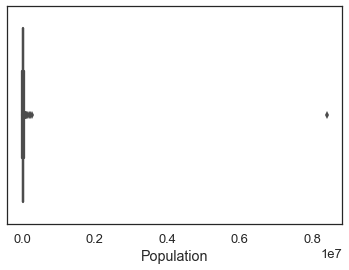

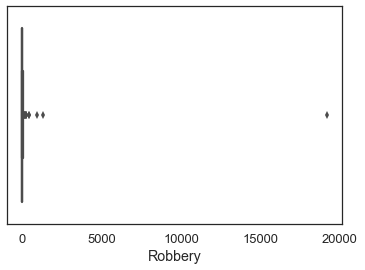

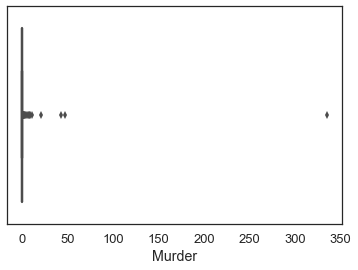

In [202]:
import math
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
sns.set(style="white", context="talk")

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd")
 
#Read file and remove commas from numbers (currently strings)
df = pd.read_csv('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.csv')
df['Property crime'] = df['Property crime'].map(lambda x: ''.join(list(filter(str.isdigit, str(x)))))
df['Population'] = df['Population'].map(lambda x: ''.join(list(filter(str.isdigit, str(x)))))
df['Robbery'] = df['Robbery'].map(lambda x: ''.join(list(filter(str.isdigit, str(x)))))

#Convert strings to integers and read into file
df['Property crime'] = list(map(int, df['Property crime']))
df['Population'] = list(map(int, df['Population']))
df['Robbery'] = list(map(int, df['Robbery']))
df = df.rename(columns={'Murder and nonnegligent manslaughter': 'Murder'})
df['Murder'] = list(map(int, df['Murder']))

#Create variables
property_crime = df['Property crime']
population = df['Population']
robbery = df['Robbery']
murder = df['Murder']
df['PopSquared'] = pd.Series(population**2, index=df.index)

#Plot variables
sns.boxplot(population)
plt.show()

sns.boxplot(robbery)
plt.show()

sns.boxplot(murder)
plt.show()

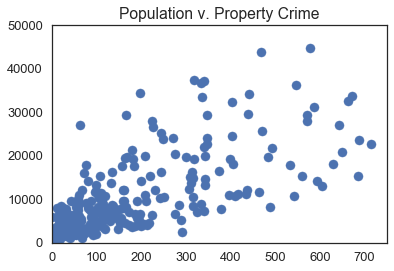

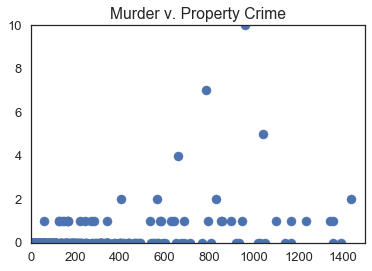

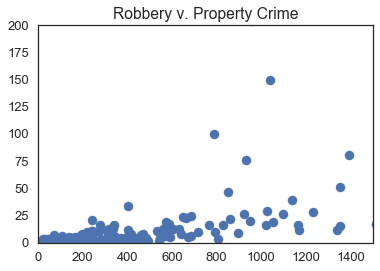

In [203]:
plt.scatter(property_crime, population)
plt.title('Population v. Property Crime')
plt.axis([0, 750, 0, 50000])
plt.show()

plt.scatter(property_crime, murder)
plt.title('Murder v. Property Crime')
plt.axis([0, 1500, 0, 10])
plt.show()

plt.scatter(property_crime, robbery)
plt.title('Robbery v. Property Crime')
plt.axis([0, 1500, 0, 200])
plt.show()

It appears that there is a major outlier for all three categories. Sorting by population shows that this outlier is New York. We know that New York is a pretty large city, and therefore it is probably not an outlier that should be removed. Instead, I'll create a categorical variable to sort by large vs. small cities.

In [204]:
df.sort_values('Population', ascending=False).head(20)

,City,Population,Violent crime,Murder,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,PopSquared
216,New York,8396126,"52,384",335,nan,"1,112",19170,"31,767",141971,"16,606","117,931","7,434",nan,70494931807876
35,Buffalo,258789,"3,249",47,nan,145,1322,"1,735",12491,"3,458","8,076",957,nan,66971746521
272,Rochester,210562,"2,107",42,nan,92,918,"1,055",10051,"2,587","6,855",609,132.000,44336355844
346,Yonkers,199134,"1,036",6,nan,25,390,615,2368,470,"1,662",236,10.000,39654349956
310,Syracuse,143834,"1,192",21,nan,75,400,696,6473,"1,781","4,298",394,57.000,20688219556
7,Amherst Town,118296,107,1,nan,7,31,68,2118,204,"1,882",32,3.000,13993943616
3,Albany,97956,791,8,nan,30,227,526,4090,705,"3,243",142,nan,9595377936
126,Greece Town,96667,151,0,nan,9,60,82,2303,332,"1,925",46,nan,9344508889
267,Ramapo Town,87204,57,2,nan,5,9,41,567,88,466,13,nan,7604537616
57,Clarkstown Town,80705,65,0,nan,8,17,40,1515,99,"1,388",28,nan,6513297025


**Model #1**

This model was developed using variables prescribed in the question prompt, including:
* Population
* Population^2
* Murder
* Robbery

In [205]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df['Property crime'].values.reshape(-1, 1)
X = df[['Population','PopSquared','Murder','Robbery']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  1.59234099e-02  -1.01045767e-09   1.17559526e+02   2.09186042e+00]]

Intercept: 
 [ 24.1435902]

R-squared:
0.998741742243


**Evaluating Model #1**

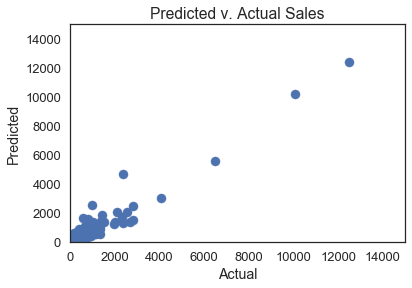

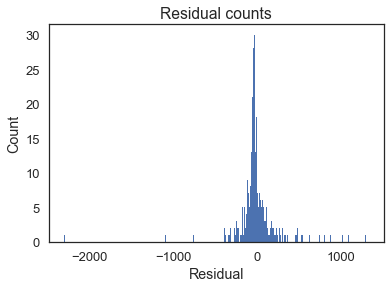

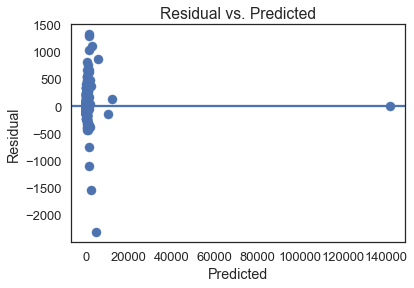

,Population,PopSquared,Murder,Robbery
Population,1.000,0.998,0.987,0.998
PopSquared,0.998,1.000,0.980,0.996
Murder,0.987,0.980,1.000,0.993
Robbery,0.998,0.996,0.993,1.000


In [206]:
########
#Evaluating multivariate normality
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = df['Property crime']

# Calculate the error, also called the residual.
residual = actual - predicted
abs_resid = abs(residual)
df['Absolute Residual'] = pd.Series(abs_resid, index=df.index)

#Plot actual vs predicted data
plt.scatter(actual, predicted)
plt.xlabel('Actual')
plt.axis([0, 15000, 0, 15000])
plt.ylabel('Predicted')
plt.title('Predicted v. Actual Sales')
plt.show()

binwidth = 10
plt.hist(residual, bins=np.arange(min(residual), max(residual) + binwidth, binwidth))
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

#######
#Evaluating homoscedacity
df['Predicted'] = pd.Series(predicted, index=df.index)
df['Residual'] = pd.Series(residual, index=df.index)

#Plot all data
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

######
#Evaluating multicolinearity
correlation_matrix = X.corr()
display(correlation_matrix)

In [207]:
df2 = df[['City', 'Population', 'Murder','Robbery','Property crime','Predicted','Residual','Absolute Residual']].copy()
df2.sort_values('Absolute Residual', ascending=False).head(20)

,City,Population,Murder,Robbery,Property crime,Predicted,Residual,Absolute Residual
346,Yonkers,199134,6,390,2368,4676.150,-2308.150,2308.150
140,Hempstead Village,55198,10,204,958,2502.340,-1544.340,1544.340
53,Cheektowaga Town,78361,0,48,2689,1366.123,1322.877,1322.877
218,Niagara Falls,49574,3,166,2807,1510.975,1296.025,1296.025
3,Albany,97956,8,227,4090,2989.570,1100.430,1100.430
267,Ramapo Town,87204,2,9,567,1658.990,-1091.990,1091.990
22,Binghamton,46304,3,101,2349,1323.251,1025.749,1025.749
310,Syracuse,143834,21,400,6473,5599.061,873.939,873.939
210,Newburgh Town,30984,0,15,1353,547.922,805.078,805.078
262,Poughkeepsie,30778,7,100,787,1545.380,-758.380,758.380


**Model #2**

After reviewing the information above, we can see that:
* The variable "PopSqrd" has a quadratic relationship to the property crime and can be removed since any effort to linearize it would just yield the "population" variable, which is already represented
* There is significant colinearity between the "population","murder" and "robbery" variables and therefore one of the three variables may be sufficient for representing the other two.

First, we'll include two new categorical variables: "Murder Boolean" and "Robbery Boolean"

In [208]:
#Create Categorical Variable for murder data and append to dataframe
Murder_Bool = []
for i in range(len(murder)):
    if murder[i]>0:
        Murder_Bool.append(1)
    else:
        Murder_Bool.append(0)
df['Murder Boolean'] = pd.Series(Murder_Bool, index=df.index)

#Create Categorical Variable for robbery data and append to dataframe
Robbery_Bool = []
for i in range(len(robbery)):
    if robbery[i]>0:
        Robbery_Bool.append(1)
    else:
        Robbery_Bool.append(0)
df['Robbery Boolean'] = pd.Series(Robbery_Bool, index=df.index)
df.sort_values('Population', ascending=False)

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df['Property crime'].values.reshape(-1, 1)
X = df[['Population','Murder','Robbery','Murder Boolean','Robbery Boolean']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  1.06036870e-02   2.10319099e+02  -9.18365338e-01   4.50097933e+00
    1.76947871e+02]]

Intercept: 
 [-1.272476]

R-squared:
0.998486806295


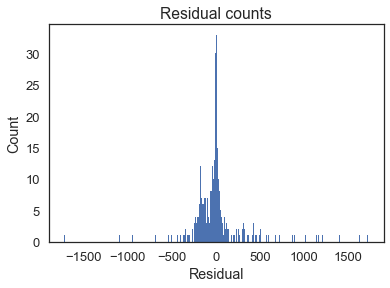

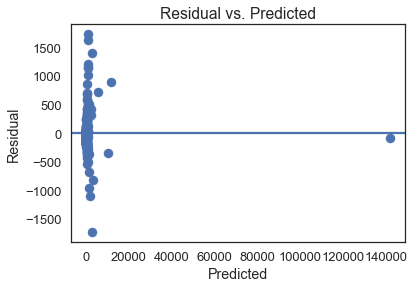

,Population,Murder,Robbery,Murder Boolean,Robbery Boolean
Population,1.000,0.987,0.998,0.162,0.064
Murder,0.987,1.000,0.993,0.212,0.070
Robbery,0.998,0.993,1.000,0.166,0.058
Murder Boolean,0.162,0.212,0.166,1.000,0.313
Robbery Boolean,0.064,0.070,0.058,0.313,1.000


In [209]:
########
#Evaluating multivariate normality
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = df['Property crime']

# Calculate the error, also called the residual.
residual = actual - predicted
abs_resid = abs(residual)
df['Absolute Residual'] = pd.Series(abs_resid, index=df.index)

binwidth = 10
plt.hist(residual, bins=np.arange(min(residual), max(residual) + binwidth, binwidth))
#plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

#######
#Evaluating homoscedacity
df['Predicted'] = pd.Series(predicted, index=df.index)
df['Residual'] = pd.Series(residual, index=df.index)

#Plot all data
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

######
#Evaluating multicolinearity
correlation_matrix = X.corr()
display(correlation_matrix)

In [210]:
df2 = df[['City', 'Population', 'Murder','Murder Boolean','Robbery',
          'Robbery Boolean','Property crime','Predicted','Residual','Absolute Residual']].copy()
df2.sort_values('Absolute Residual', ascending=False).head(20)

,City,Population,Murder,Murder Boolean,Robbery,Robbery Boolean,Property crime,Predicted,Residual,Absolute Residual
53,Cheektowaga Town,78361,0,0,48,1,2689,962.509,1726.491,1726.491
140,Hempstead Village,55198,10,1,204,1,958,2681.323,-1723.323,1723.323
218,Niagara Falls,49574,3,1,166,1,2807,1184.352,1622.648,1622.648
3,Albany,97956,8,1,227,1,4090,2692.955,1397.045,1397.045
315,Troy,49898,1,1,145,1,1985,786.435,1198.565,1198.565
126,Greece Town,96667,0,0,60,1,2303,1145.600,1157.400,1157.400
22,Binghamton,46304,3,1,101,1,2349,1209.372,1139.628,1139.628
262,Poughkeepsie,30778,7,1,100,1,787,1886.934,-1099.934,1099.934
62,Colonie Town,78215,0,0,31,1,1990,976.573,1013.427,1013.427
267,Ramapo Town,87204,2,1,9,1,567,1517.233,-950.233,950.233


**Model #3**

Adding in the boolean values improved the spread to yield multivariable normality. To further reduce the variance, I added in three variables:
* Categorical - City size
* Murder per capita
* Robbery per capita

In [211]:
#Create Categorical Variable for large city data and append to dataframe
Large_City = []
for i in range(len(population)):
    if population[i]<30000:
        Large_City.append(0)
    elif population[i]<60000:
        Large_City.append(1)
    else:
        Large_City.append(2)
df['Large City'] = pd.Series(Large_City, index=df.index)

#Create variable for murder per capita and append to dataframe
Murder_PerCap = []
for i in range(len(murder)):
    Murder_PerCap.append(murder[i]/population[i])
df['Murder Per Capita'] = pd.Series(Murder_PerCap, index=df.index)

#Create variable for robbery per capita and append to dataframe
Robbery_PerCap = []
for i in range(len(robbery)):
    Robbery_PerCap.append(robbery[i]/population[i])
df['Robbery Per Capita'] = pd.Series(Robbery_PerCap, index=df.index)

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df['Property crime'].values.reshape(-1, 1)
X = df[['Population','Large City','Murder','Murder Per Capita','Robbery',
        'Murder Boolean','Robbery Boolean','Robbery Per Capita']]
#X = df[['Population','Large City','Murder','Murder Per Capita','Robbery','Robbery Per Capita']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  7.62680006e-03   2.95778436e+02   1.78932094e+02  -4.51296058e+06
    8.90948679e-01   1.48373395e+02   1.12201228e+02   1.02896162e+05]]

Intercept: 
 [ 12.06443946]

R-squared:
0.998916869757


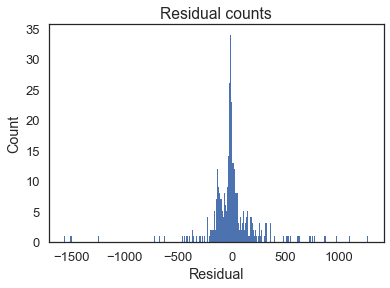

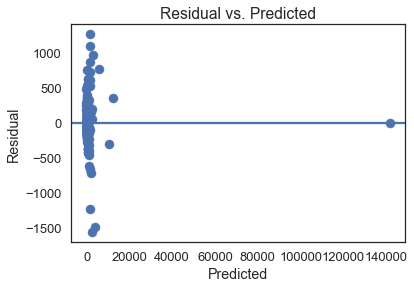

,Population,Large City,Murder,Murder Per Capita,Robbery,Murder Boolean,Robbery Boolean,Robbery Per Capita
Population,1.000,0.249,0.987,0.072,0.998,0.162,0.064,0.180
Large City,0.249,1.000,0.290,0.373,0.247,0.495,0.286,0.528
Murder,0.987,0.290,1.000,0.169,0.993,0.212,0.070,0.273
Murder Per Capita,0.072,0.373,0.169,1.000,0.094,0.783,0.244,0.640
Robbery,0.998,0.247,0.993,0.094,1.000,0.166,0.058,0.207
Murder Boolean,0.162,0.495,0.212,0.783,0.166,1.000,0.313,0.539
Robbery Boolean,0.064,0.286,0.070,0.244,0.058,0.313,1.000,0.430
Robbery Per Capita,0.180,0.528,0.273,0.640,0.207,0.539,0.430,1.000


In [212]:
########
#Evaluating multivariate normality
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = df['Property crime']

# Calculate the error, also called the residual.
residual = actual - predicted
abs_resid = abs(residual)
df['Absolute Residual'] = pd.Series(abs_resid, index=df.index)

binwidth = 10
plt.hist(residual, bins=np.arange(min(residual), max(residual) + binwidth, binwidth))
#plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

#######
#Evaluating homoscedacity
df['Predicted'] = pd.Series(predicted, index=df.index)
df['Residual'] = pd.Series(residual, index=df.index)

#Plot all data
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

######
#Evaluating multicolinearity
correlation_matrix = X.corr()
display(correlation_matrix)

In [213]:
df2 = df[['City', 'Population', 'Murder','Murder Boolean','Murder Per Capita','Robbery',
          'Robbery Boolean','Robbery Per Capita','Property crime','Predicted','Residual','Absolute Residual']].copy()
df2.sort_values('Absolute Residual', ascending=False).head(20)

,City,Population,Murder,Murder Boolean,Murder Per Capita,Robbery,Robbery Boolean,Robbery Per Capita,Property crime,Predicted,Residual,Absolute Residual
140,Hempstead Village,55198,10,1,0.000,204,1,0.004,958,2523.163,-1565.163,1565.163
346,Yonkers,199134,6,1,0.000,390,1,0.002,2368,3869.556,-1501.556,1501.556
53,Cheektowaga Town,78361,0,0,0.000,48,1,0.001,2689,1419.261,1269.739,1269.739
267,Ramapo Town,87204,2,1,0.000,9,1,0.000,567,1802.282,-1235.282,1235.282
218,Niagara Falls,49574,3,1,0.000,166,1,0.003,2807,1702.649,1104.351,1104.351
3,Albany,97956,8,1,0.000,227,1,0.002,4090,3114.867,975.133,975.133
22,Binghamton,46304,3,1,0.000,101,1,0.002,2349,1480.401,868.599,868.599
310,Syracuse,143834,21,1,0.000,400,1,0.003,6473,5702.395,770.605,770.605
330,Watertown,28179,0,0,0.000,16,1,0.001,1165,411.861,753.139,753.139
126,Greece Town,96667,0,0,0.000,60,1,0.001,2303,1570.406,732.594,732.594
